> In this article, we will try to explore different trends from the Black Friday shopping dataset. We will extract useful information that will answer questions such as: what gender shops more on Black Friday? Do the occupations of the people have any impact on sales? Which age group is the highest spender?

> In the end, we will create a simple machine learning algorithm that predicts the amount of money that a person is likely to spend on Black Friday depending on features such as gender, age, and occupation.

> The first step is to import the libraries that we will need in this section:


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

> now we have a general picture of the data, let's print information about first five customers (first five rows of our DataFrame):

In [2]:
dataset = pd.read_csv('../input/gb-black-friday-sales/train.csv')
print('Dataset :\n',dataset.head(5))
print('----------------------------------------------------')
print('Shape :',dataset.shape)
print('----------------------------------------------------')
print('Dataset Columns :',dataset.columns)

Dataset :
    User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1004085  P00075742      F  26-35           6             A   
1  1005491  P00234842      M  18-25           7             A   
2  1003499  P00220142      M  26-35           3             A   
3  1000097  P00211242      F  36-45           3             C   
4  1005802  P00327142      F  26-35           0             A   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          1               0                   8   
1                          1               0                   5   
2                          2               0                   1   
3                          3               0                   8   
4                         4+               0                   8   

   Product_Category_2  Product_Category_3  Purchase  
0                14.0                 NaN      7803  
1                 6.0                16.0      6903  
2                15.0      

In [3]:
test = pd.read_csv('../input/gb-black-friday-sales/test.csv')
print('Test \n :',test.head(5))
print('----------------------------------------------------')
print('Shape :',test.shape)
print('----------------------------------------------------')
print('Test Columns :',test.columns)

Test 
 :    User_ID Product_ID Gender    Age  Occupation City_Category  \
0  1002118  P00108542      M  26-35          14             A   
1  1002476  P00086442      M  51-55          12             C   
2  1005220  P00248442      M  26-35           7             B   
3  1005213  P00270242      M  18-25           0             C   
4  1002374  P00106042      M  26-35          14             B   

  Stay_In_Current_City_Years  Marital_Status  Product_Category_1  \
0                          1               1                   5   
1                          1               1                   8   
2                         4+               0                   3   
3                          2               0                   8   
4                          2               0                   5   

   Product_Category_2  Product_Category_3  
0                 8.0                14.0  
1                13.0                15.0  
2                 4.0                 NaN  
3              

> Unimportant columns will give me mislead data

In [4]:
dataset.drop(['User_ID','Product_ID'],axis=1,inplace=True)
test.drop(['User_ID','Product_ID'],axis=1,inplace=True)
print(dataset.shape)
print(test.shape)

(80000, 10)
(20000, 9)


> First we will look at the data

Male 60068
Female 19932


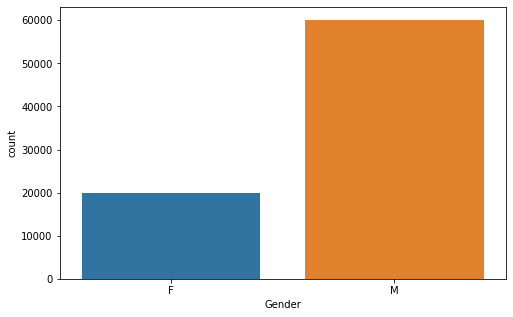

In [5]:
n = dataset.Gender
M,F = n.value_counts()
print("Male",M)
print('Female',F)
plt.figure(figsize=(8,5))
sns.countplot(x='Gender',data=dataset)
plt.show()

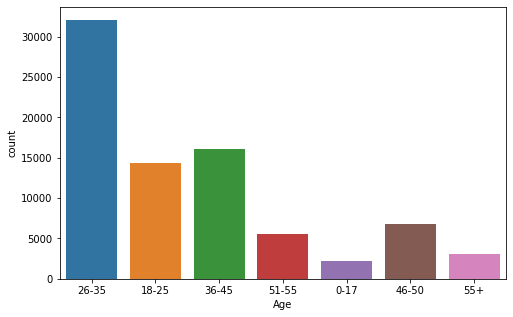

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(x='Age',data=dataset)
plt.show()

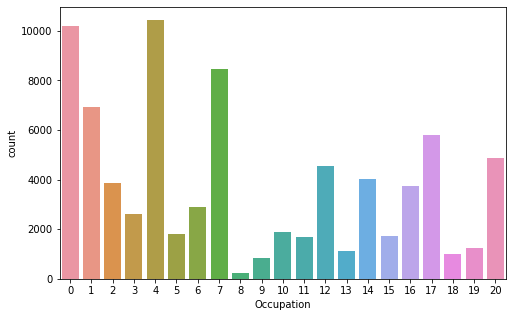

In [7]:
plt.figure(figsize=(8,5))
sns.countplot(x='Occupation',data=dataset)
plt.show()

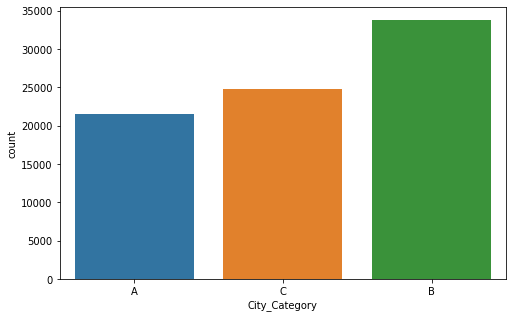

In [8]:
plt.figure(figsize=(8,5))
sns.countplot(x='City_Category',data=dataset)
plt.show()

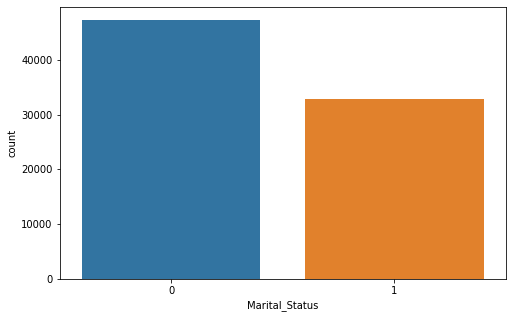

In [9]:
plt.figure(figsize=(8,5))
sns.countplot(x='Marital_Status',data=dataset)
plt.show()

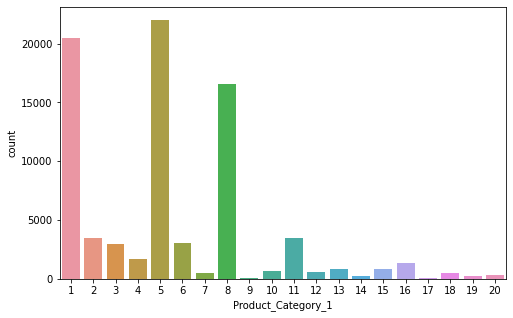

In [10]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product_Category_1',data=dataset)
plt.show()

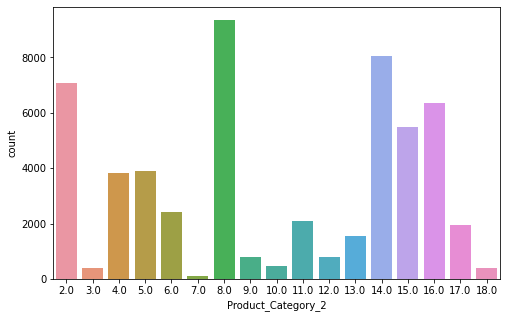

In [11]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product_Category_2',data=dataset)
plt.show()

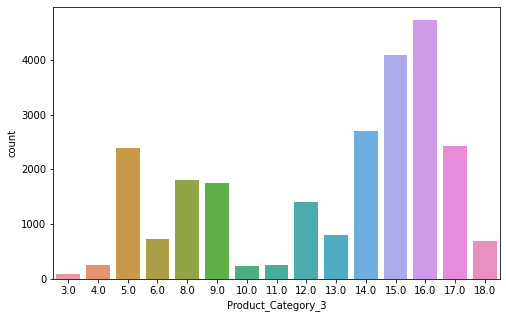

In [12]:
plt.figure(figsize=(8,5))
sns.countplot(x='Product_Category_3',data=dataset)
plt.show()

In [13]:
dataset.corr()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
Occupation,1.000000,0.022993,-0.003740,0.005334,0.018298,0.021532
Marital_Status,0.022993,1.000000,0.020682,0.015364,0.028185,0.003141
Product_Category_1,-0.003740,0.020682,1.000000,0.540332,0.228898,-0.353686
Product_Category_2,0.005334,0.015364,0.540332,1.000000,0.543862,-0.212258
Product_Category_3,0.018298,0.028185,0.228898,0.543862,1.000000,-0.022443
Purchase,0.021532,0.003141,-0.353686,-0.212258,-0.022443,1.000000


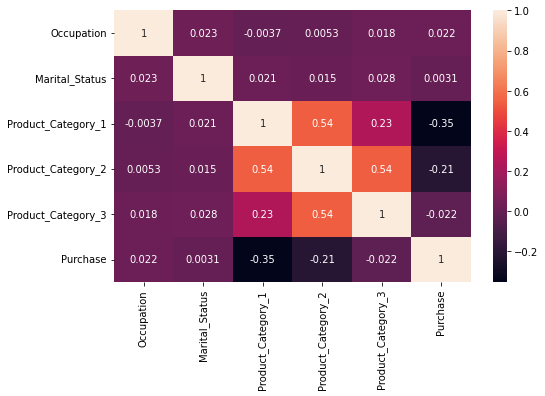

In [14]:
plt.figure(figsize=(8,5))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

<AxesSubplot:>

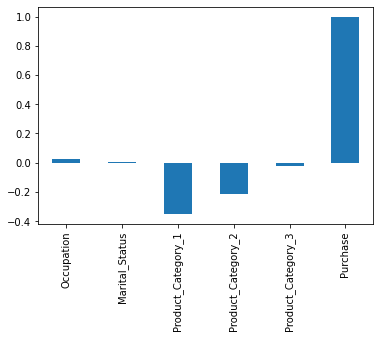

In [15]:
dataset.corr()['Purchase'].plot(kind='bar')

> The first thing that we need to do is deal with missing data in columns Product_Category_2 and Product_Category_3. We have only 30% of data inside Product_Category_3 and 69% of data inside Product_Category_2. 30% of real data is a small ratio, we could fill missing values inside this category with the mean of the existing values, but that means that 70% of data will be artificial, which could ruin our future machine learning model. The best alternative for this problem is to drop this column from further analysis. We will use drop function to do that:

In [16]:
dataset.isnull().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2            25108
Product_Category_3            55669
Purchase                          0
dtype: int64

<AxesSubplot:>

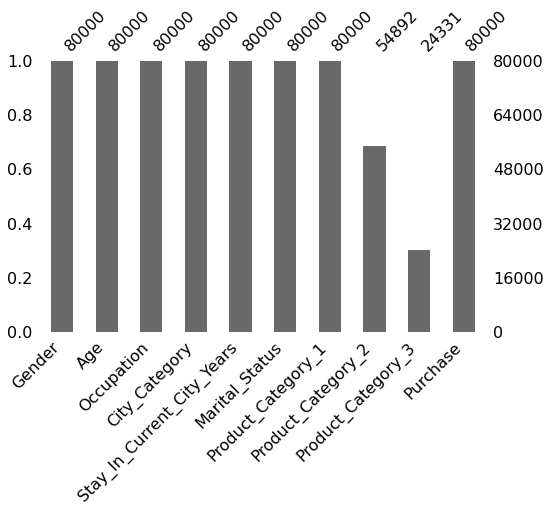

In [17]:
import missingno as msngo
msngo.bar(dataset,figsize=(8,5))

In [18]:
test.isnull().sum()

Gender                            0
Age                               0
Occupation                        0
City_Category                     0
Stay_In_Current_City_Years        0
Marital_Status                    0
Product_Category_1                0
Product_Category_2             6402
Product_Category_3            13936
dtype: int64

<AxesSubplot:>

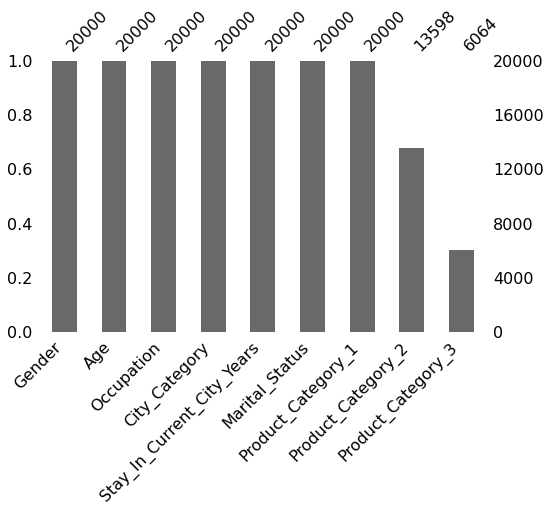

In [19]:
import missingno as msngo
msngo.bar(test,figsize=(8,5))

In [20]:
dataset['Product_Category_2'] = dataset['Product_Category_2'].fillna(-1.0).astype("float32")
dataset['Product_Category_3'] = dataset['Product_Category_3'].fillna(-2.0).astype("float32")

In [21]:
test['Product_Category_2'] = test['Product_Category_2'].fillna(-1.0).astype("float32")
test['Product_Category_3'] = test['Product_Category_3'].fillna(-2.0).astype("float32")

In [22]:
dataset = dataset.drop(['Product_Category_3'], axis=1)
test = test.drop(['Product_Category_3'], axis=1)

> Looking at the data, we can conclude that our set possesses 12 different parameters: 7 numerical (integer and float) and 5 object variables. Furthermore, the dataset contains two short type variables: Product_Category_2 and Product_Category_3

In [23]:
num = dataset.select_dtypes('number').columns.to_list()
cat = dataset.select_dtypes('object').columns.to_list()
feature_num = dataset[num]
feature_cat = dataset[cat]

print('Number :')
for i in feature_num.columns:
  print(i)
print('----------------------------------')
print('Categorical :')
for v in feature_cat.columns:
  print(v)

Number :
Occupation
Marital_Status
Product_Category_1
Product_Category_2
Purchase
----------------------------------
Categorical :
Gender
Age
City_Category
Stay_In_Current_City_Years


In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

dataset['Gender'] = dataset['Gender'].map({'M':1,'F':0}) 
dataset['City_Category'] = dataset['City_Category'].map({'A':0,'B':1,'C':2}) 
dataset['Stay_In_Current_City_Years'] = le.fit_transform(dataset['Stay_In_Current_City_Years'])


In [25]:
test['Gender'] = test['Gender'].map({'M':1,'F':0}) 
test['City_Category'] = test['City_Category'].map({'A':0,'B':1,'C':2}) 
test['Stay_In_Current_City_Years'] = le.fit_transform(test['Stay_In_Current_City_Years'])

In [26]:
def map_age(age):
  if age == '0-17':
    return 0
  elif age == '18-25':
    return 1
  elif age == '26-35':
    return 2
  elif age == '36-45':
    return 3
  elif age == '46-50':
    return 4
  elif age == '51-55':
    return 5
  else:
    return 6

dataset['Age'] = dataset['Age'].apply(map_age)
test['Age'] = test['Age'].apply(map_age)

In [27]:
dataset = pd.concat([dataset, pd.get_dummies(dataset['City_Category'], prefix='City_Category')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Age'], prefix='Age')], axis=1)
dataset = pd.concat([dataset, pd.get_dummies(dataset['Stay_In_Current_City_Years'], prefix='Stay_In_Current_City_Years')], axis=1)

In [28]:
test = pd.concat([test, pd.get_dummies(test['City_Category'], prefix='City_Category')], axis=1)
test = pd.concat([test, pd.get_dummies(test['Age'], prefix='Age')], axis=1)
test = pd.concat([test, pd.get_dummies(test['Stay_In_Current_City_Years'], prefix='Stay_In_Current_City_Years')], axis=1)

In [29]:
dataset.drop(['City_Category','Age','Stay_In_Current_City_Years'],axis=1,inplace=True)
test.drop(['City_Category','Age','Stay_In_Current_City_Years'],axis=1,inplace=True)

In [30]:
dataset

,Gender,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase,City_Category_0,City_Category_1,City_Category_2,Age_0,...,Age_2,Age_3,Age_4,Age_5,Age_6,Stay_In_Current_City_Years_0,Stay_In_Current_City_Years_1,Stay_In_Current_City_Years_2,Stay_In_Current_City_Years_3,Stay_In_Current_City_Years_4
0,0,6,0,8,14.0,7803,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,1,7,0,5,6.0,6903,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2,1,3,0,1,15.0,15773,1,0,0,0,...,1,0,0,0,0,0,0,1,0,0
3,0,3,0,8,12.0,8116,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,8,15.0,6144,1,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,0,1,0,5,-1.0,5231,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
79996,1,14,1,3,4.0,10904,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
79997,1,4,0,5,8.0,6953,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
79998,1,7,0,8,14.0,5888,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


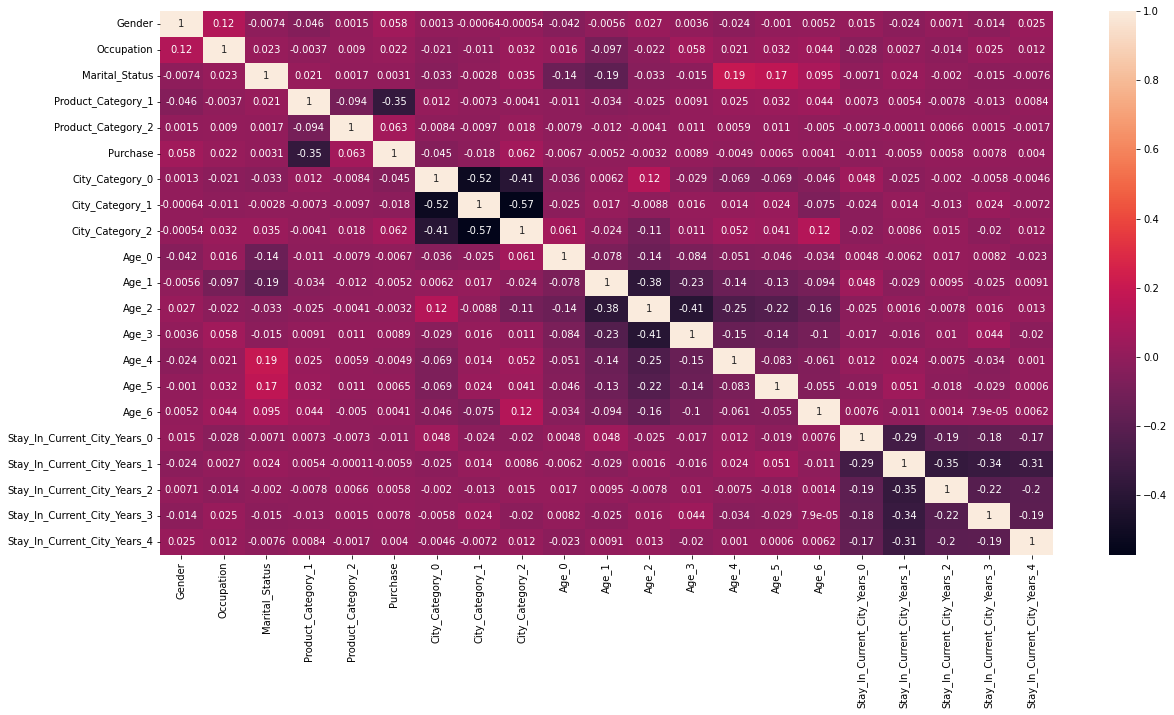

In [31]:
plt.figure(figsize=(20,10))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [32]:
y=dataset['Purchase'].values
X = dataset.drop(['Purchase'],axis=1,inplace=True)
X = dataset.values
test = test.values

In [33]:
print('X Shape:',X.shape)
y = np.reshape(y,(y.shape[0],1))
print('y shape',y.shape)
print('Test Shape',test.shape)

X Shape: (80000, 20)
y shape (80000, 1)
Test Shape (20000, 20)


In [34]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score
from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
def train(model, X, y):
    # train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.25)

    Cross_Validation1 = cross_validate(model, X, y, cv=5, return_train_score=True)
    CrossValidateValues2 = cross_validate(model,X,y,cv=5,scoring=('r2','neg_mean_squared_error'),return_train_score = True)

    print('Train Score Value : ', Cross_Validation1['train_score'])
    print('Test Score Value : ', Cross_Validation1['test_score'])
    print('*********************************************************************************************')
    print('Train MSE Value : ', CrossValidateValues2['train_neg_mean_squared_error'])
    print('Test MSE Value : ', CrossValidateValues2['test_neg_mean_squared_error'])
    print('*********************************************************************************************')
    print('Train R2 Value : ', CrossValidateValues2['train_r2'])
    print('Test R2 Value : ', CrossValidateValues2['test_r2'])
    print('*********************************************************************************************')

    # cross validation
    cv_score = cross_val_score(model, X, y, scoring='neg_mean_squared_error', cv=5)
    cv_score_r2 = cross_val_score(model, X, y, scoring='r2', cv=5)

    cv_score = np.abs(np.mean(cv_score))
    print("CV Mean Square Errors [MSE] :", cv_score)
    print("CV Root Mean Square Errors [RMSE] :", np.sqrt(cv_score))
    print("CV R2 :", np.mean(cv_score_r2))
    print('*********************************************************************************************')

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    MAE = mean_absolute_error(y_test, y_pred) 
    print('Mean Absolute Error Value in Model is : ', MAE)

    MSE = mean_squared_error(y_test, y_pred) 
    print('Mean Squared Error Value in Model is : ', MSE)
    
    RMSE =  np.sqrt(MSE)
    print('Root Mean Squared Error Value in Model is : ',RMSE)

    r2 = r2_score(y_test,y_pred)
    print('R2 Value in Model is : ',r2)



In [35]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
train(lr, X, y)

Train Score Value :  [0.13182835 0.13243304 0.13229127 0.13484427 0.13233144]
Test Score Value :  [0.13579439 0.13327524 0.13401364 0.12369709 0.13399755]
*********************************************************************************************
Train MSE Value :  [-21821837.28096109 -21867282.05952765 -21928377.75400956
 -21825286.33717397 -21887846.92254214]
Test MSE Value :  [-22057116.01444816 -21878343.62557647 -21631442.68746178
 -22043630.59477293 -21789769.46320127]
*********************************************************************************************
Train R2 Value :  [0.13182835 0.13243304 0.13229127 0.13484427 0.13233144]
Test R2 Value :  [0.13579439 0.13327524 0.13401364 0.12369709 0.13399755]
*********************************************************************************************
CV Mean Square Errors [MSE] : 21880060.477092125
CV Root Mean Square Errors [RMSE] : 4677.612689940471
CV R2 : 0.13215558316323736
**************************************************

In [36]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor(max_depth=8)
train(dt, X, y)

Train Score Value :  [0.65133175 0.65188725 0.65494122 0.65387231 0.65301198]
Test Score Value :  [0.65250261 0.64863893 0.63709064 0.63925017 0.63474994]
*********************************************************************************************
Train MSE Value :  [-8763914.04980228 -8774284.81135301 -8720183.52351313 -8731764.31004488
 -8753135.79112267]
Test MSE Value :  [-8867098.71039796 -8883746.92940974 -9075805.76715887 -9073973.56782325
 -9188623.80794417]
*********************************************************************************************
Train R2 Value :  [0.65133175 0.65188725 0.65494122 0.65387231 0.65301198]
Test R2 Value :  [0.65258393 0.64806461 0.63666205 0.63928131 0.63481162]
*********************************************************************************************
CV Mean Square Errors [MSE] : 9012478.804652354
CV Root Mean Square Errors [RMSE] : 3002.0790803462114
CV R2 : 0.642449495559408
**************************************************************

In [37]:
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score
rf=RandomForestRegressor(max_depth=10,n_estimators=40,min_samples_split=12)
train(rf, X, y)

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

Train Score Value :  [0.66967091 0.66882606 0.67115014 0.67133137 0.67179282]
Test Score Value :  [0.65651594 0.65421393 0.6430406  0.64487707 0.64285075]
*********************************************************************************************
Train MSE Value :  [-8322178.42371921 -8353456.3465821  -8307089.39180186 -8290525.22432855
 -8264083.26427121]
Test MSE Value :  [-8746989.68020438 -8755393.01720767 -8905855.01410974 -8923865.83173767
 -8957666.17674693]
*********************************************************************************************
Train R2 Value :  [0.668906   0.66858329 0.6712874  0.67136306 0.67239878]
Test R2 Value :  [0.65728985 0.65314943 0.64346581 0.64524856 0.64399069]
*********************************************************************************************


/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:531: DataConversionWarning: A column-vector y was passed when a 

CV Mean Square Errors [MSE] : 8858271.840741446
CV Root Mean Square Errors [RMSE] : 2976.284905841752
CV R2 : 0.6485758615672472
*********************************************************************************************


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:32: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Mean Absolute Error Value in Model is :  2223.705318072214
Mean Squared Error Value in Model is :  8690630.89319797
Root Mean Squared Error Value in Model is :  2947.987600584163
R2 Value in Model is :  0.6527179710680084


In [38]:
submission = pd.read_csv('../input/gb-black-friday-sales/sample_submission.csv')
submission

,Id,Purchase
0,0,9000
1,1,9000
2,2,9000
3,3,9000
4,4,9000
...,...,...
19995,19995,9000
19996,19996,9000
19997,19997,9000
19998,19998,9000


In [39]:
pred = rf.predict(test)
print(pred)

[ 6516.52116424  7668.73826008 10027.83317383 ...  6480.44257934
  7370.69852036  6542.73877051]


In [40]:
submission.loc[:, 'Purchase'] = pred
submission

,Id,Purchase
0,0,6516.521164
1,1,7668.738260
2,2,10027.833174
3,3,7629.601320
4,4,5981.432076
...,...,...
19995,19995,13687.899967
19996,19996,12169.149440
19997,19997,6480.442579
19998,19998,7370.698520


In [41]:
submission.to_csv('submission.csv', index=False)

> we used a machine learning algorithm to predict the amount that a customer is likely to spend on Black Friday.